# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Syifa Azzahro
- **Email:** spectre02black@gmail.com
- **ID Dicoding:** syifa_azzahro_OkYd

## Menentukan Pertanyaan Bisnis

- Bagaimana distribusi metode pembayaran yang digunakan pelanggan?
- Kota mana saja yang memiliki angka penjualan tertinggi?

## Import Semua Packages/Library yang Digunakan

In [3]:
!pip install openpyxl xlrd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## Data Wrangling

### Gathering Data

Customer Dataset

In [ ]:
# mengimpor dataset dengan absolute path
customers_df = pd.read_excel("https://raw.githubusercontent.com/Sipa02/Proyek_analisis_data/main/Dataset/customers.xlsx")
# menampilkan 5 data teratas dari dataset
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


Sellers Dataset

In [ ]:
# mengimpor dataset dengan absolute path
sellers_df = pd.read_csv("https://raw.githubusercontent.com/Sipa02/Proyek_analisis_data/main/Dataset/sellers_dataset.csv")
# menampilkan 5 data teratas
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


Products Dataset

In [ ]:
# mengimpor dataset dengan absolute path
products_df = pd.read_csv("https://raw.githubusercontent.com/Sipa02/Proyek_analisis_data/main/Dataset/products_dataset.csv")
# menampilkan 5 data teratas
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


Product Category Dataset

In [ ]:
# mengimpor dataset dengan absolute path
product_category_df = pd.read_csv("https://raw.githubusercontent.com/Sipa02/Proyek_analisis_data/main/Dataset/product_category_name_translation.csv")
# menampilkan 5 data teratas
product_category_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


Orders Dataset

In [ ]:
# mengimpor dataset dengan absolute path
orders_df = pd.read_csv("https://raw.githubusercontent.com/Sipa02/Proyek_analisis_data/main/Dataset/orders_dataset.csv")
# menampilkan 5 data teratas
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


Order Review Dataset

In [ ]:
# mengimpor dataset dengan absolute path
order_reviews_df = pd.read_csv("https://raw.githubusercontent.com/Sipa02/Proyek_analisis_data/main/Dataset/order_reviews_dataset.csv")
# menampilkan 5 data teratas
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


Order Payments Dataset

In [ ]:
# mengimpor dataset dengan absolute path
order_payments_df = pd.read_csv("https://raw.githubusercontent.com/Sipa02/Proyek_analisis_data/main/Dataset/order_payments_dataset.csv")
# menampilkan 5 data teratas
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


Order Items Dataset

In [ ]:
# mengimpor dataset dengan absolute path
order_items_df = pd.read_csv("https://raw.githubusercontent.com/Sipa02/Proyek_analisis_data/main/Dataset/order_items_dataset.csv")
# menampilkan 5 data teratas
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


Geolocation Dataset

In [14]:
from google.colab import drive
drive.mount('/content/drive')

# mengimpor dataset dengan absolute path
geolokasi_df = pd.read_csv("/content/drive/MyDrive/E-Commerce Public Dataset/olist_geolocation_dataset.csv")
# menampilkan 5 data teratas
geolokasi_df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


### Assessing Data

####Menilai Tabel 'customers_df'

In [ ]:
# memeriksa struktur data data tabel
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [ ]:
# menghitung jumlah missing value
customers_df.isna().sum()

,0
customer_id,0
customer_unique_id,0
customer_zip_code_prefix,0
customer_city,0
customer_state,0


In [ ]:
# menampilkan jumlah duplikat pada data
print("Jumlah duplikasi: ", customers_df.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
# menampilkan parameter statistik
customers_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


####Menilai Tabel Seller

In [ ]:
# memeriksa struktur data tabel
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [ ]:
# menghitung jumlah missing value
sellers_df.isna().sum()

,0
seller_id,0
seller_zip_code_prefix,0
seller_city,0
seller_state,0


In [ ]:
# menghitung data duplikat
print("Jumlah duplikasi: ", sellers_df.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
# menampilkan parameter statistik
sellers_df.describe()

,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


####Menilai Tabel Product

In [ ]:
# memeriksa struktur data
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [ ]:
# menghitung jumlah missing value
products_df.isna().sum()

,0
product_id,0
product_category_name,610
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


In [ ]:
# menampilkan jumlah duplikat data
print("Jumlah duplikasi: ", products_df.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
# menampilkan parameter statistik
products_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


####Menilai Tabel Produk Kategori

In [ ]:
# memeriksa struktur data pada tabel
product_category_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [ ]:
# menghitung jumlah missing value
product_category_df.isna().sum()

,0
product_category_name,0
product_category_name_english,0


In [ ]:
# menghitung jumlah duplikat data
print("Jumlah duplikasi: ", product_category_df.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
# menampilkan parameter statistik
product_category_df.describe()

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


####Menilai Tabel Order

In [ ]:
# memeriksa struktur data
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [ ]:
# menghitung jumlah missing value
orders_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


In [ ]:
# menghitung jumlah duplikat data
print("Jumlah duplikasi: ", orders_df.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
# menampilkan parameter statistik
orders_df.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


####Menilai Tabel Order Review

In [ ]:
# memeriksa struktur data
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [ ]:
# menghitung jumlah missing value
order_reviews_df.isna().sum()

,0
review_id,0
order_id,0
review_score,0
review_comment_title,87656
review_comment_message,58247
review_creation_date,0
review_answer_timestamp,0


In [ ]:
# menghitung jumlah duplikat data
print("Jumlah duplikasi: ", order_reviews_df.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
# menampilkan parameter statistik
order_reviews_df.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


####Menilai Tabel Order Payments

In [ ]:
# memeriksa struktur data
order_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [ ]:
# menghitung jumlah missing value
order_payments_df.isna().sum()

,0
order_id,0
payment_sequential,0
payment_type,0
payment_installments,0
payment_value,0


In [ ]:
# menghitung jumlah duplikat data
print("Jumlah duplikasi: ", order_payments_df.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
# menampilkan parameter statistik
order_payments_df.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


####Menilai Tabel Order Item

In [ ]:
# memeriksa struktur data
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [ ]:
# menghitung jumlah missing value
order_items_df.isna().sum()

,0
order_id,0
order_item_id,0
product_id,0
seller_id,0
shipping_limit_date,0
price,0
freight_value,0


In [ ]:
# menghitung jumlah duplikat data
print("Jumlah duplikasi: ", order_items_df.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
# menampilkan parameter statistik
order_items_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


####Menilai Tabel Geolocation

In [ ]:
# memeriksa struktur data
geolokasi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype 
---  ------                       --------------    ----- 
 0   geolocation_zip_code_prefix  1000163 non-null  int64 
 1   geolocation_lat              1000163 non-null  int64 
 2   geolocation_lng              1000163 non-null  int64 
 3   geolocation_city             1000163 non-null  object
 4   geolocation_state            1000163 non-null  object
dtypes: int64(3), object(2)
memory usage: 38.2+ MB


In [ ]:
# menghitung jumlah missing value
geolokasi_df.isna().sum()

,0
geolocation_zip_code_prefix,0
geolocation_lat,0
geolocation_lng,0
geolocation_city,0
geolocation_state,0


In [ ]:
# menghitung jumlah duplikat data
print("Jumlah duplikasi: ", geolokasi_df.duplicated().sum())

Jumlah duplikasi:  261831


In [ ]:
# menampilkan parameter statistik
geolokasi_df.describe()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-1.507910e+16,-1.638722e+16
std,3.054934e+04,1.055515e+16,1.928521e+16
min,1.001000e+03,-7.999462e+16,-6.898559e+16
25%,1.107500e+04,-2.350081e+16,-4.279508e+16
50%,2.653000e+04,-1.994736e+16,-4.738750e+15
75%,6.350400e+04,-2.361631e+15,-4.395779e+15
max,9.999000e+04,6.353314e+16,1.211054e+16


### Cleaning Data

####Membersihkan Tabel Orders

#####Mengubah Tipe Data

In [ ]:
# memeriksa strukutur data
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [ ]:
# mengubah tipe data object menjadi datetime

datetime_columns = ["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date"]

for column in datetime_columns:
    orders_df[column] = pd.to_datetime(orders_df[column], errors='coerce')


In [ ]:
# memeriksa kembali struktur data
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


######Mengatasi Missing Value

In [ ]:
# menghitung jumlah missing value
orders_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


Mengganti missing value pada beberapa kolom dengan menggunakan interpolation linear untuk timeseries, karena kemungkinan terdistribusi secara acak.

In [ ]:
orders_df['order_approved_at'].interpolate(method='linear', inplace=True)

In [ ]:
orders_df['order_delivered_carrier_date'].interpolate(method='linear', inplace=True)

In [ ]:
orders_df['order_delivered_customer_date'].interpolate(method='linear', inplace=True)

In [ ]:
# mengecek kembali jumlah missing value
orders_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,0
order_delivered_carrier_date,0
order_delivered_customer_date,0
order_estimated_delivery_date,0


####Membersihkan Tabel 'products_df'

#####Mengatasi missing value

In [ ]:
# menghitung jumlah missing value
products_df.isna().sum()

,0
product_id,0
product_category_name,610
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


In [ ]:
# mencari jumlah product kategori terbanyak
products_df.product_category_name.value_counts()

,count
product_category_name,
cama_mesa_banho,3029
esporte_lazer,2867
moveis_decoracao,2657
beleza_saude,2444
utilidades_domesticas,2335
...,...
fashion_roupa_infanto_juvenil,5
casa_conforto_2,5
pc_gamer,3


In [ ]:
# mengganti missing value dengan nilai mode atau nilai yang paling sering muncul
products_df['product_category_name'].fillna(value="cama_mesa_banho", inplace=True)

In [ ]:
# menampilkan parameter statistik
products_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [ ]:
# mengganti missing value dengan nilai mean
products_df['product_name_lenght'].fillna(value=48.4, inplace=True)

In [ ]:
# mengganti missing value dengan nilai mean
products_df['product_description_lenght'].fillna(value=771.4, inplace=True)

In [ ]:
# mengganti missing value dengan nilai mean
products_df['product_photos_qty'].fillna(value=2.1, inplace=True)

In [ ]:
# mengganti missing value dengan nilai mean
products_df['product_weight_g'].fillna(value=2276.4, inplace=True)

In [ ]:
# mengganti missing value dengan nilai mean
products_df['product_length_cm'].fillna(value=30.8, inplace=True)

In [ ]:
# mengganti missing value dengan nilai mean
products_df['product_height_cm'].fillna(value=16.9, inplace=True)

In [ ]:
# mengganti missing value dengan nilai mean
products_df['product_width_cm'].fillna(value=23.1, inplace=True)

In [ ]:
# memeriksa kembali jumlah missing value
products_df.isna().sum()

,0
product_id,0
product_category_name,0
product_name_lenght,0
product_description_lenght,0
product_photos_qty,0
product_weight_g,0
product_length_cm,0
product_height_cm,0
product_width_cm,0


####Membersihkan Tabel Order Review

#####Mengatasi Missing Value

In [ ]:
# menghitung jumlah missing value
order_reviews_df.isna().sum()

#Kita akan membiarkan kolom komen kosong, dikarenakan ada user yang memilih tidak untuk memberi komentar.


,0
review_id,0
order_id,0
review_score,0
review_comment_title,87656
review_comment_message,58247
review_creation_date,0
review_answer_timestamp,0


####Membersihkan Tabel 'geolokasi_df'

#####Menghilangkan Data Duplikat

In [ ]:
# menghapus data duplikat
geolokasi_df.drop_duplicates(inplace=True)

In [ ]:
# memeriksa kembali jumlah duplikasi data
print("Jumlah duplikasi: ", geolokasi_df.duplicated().sum())

Jumlah duplikasi:  0


## Exploratory Data Analysis (EDA)

####Tabel Customer

In [ ]:
# menampilkan parameter statistik secara lengkap
customers_df.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


####Tabel Seller

In [ ]:
# menampilkan parameter statistik secara lengkap
sellers_df.describe(include="all")

,seller_id,seller_zip_code_prefix,seller_city,seller_state
count,3095,3095.000000,3095,3095
unique,3095,NaN,611,23
top,3442f8959a84dea7ee197c632cb2df15,NaN,sao paulo,SP
freq,1,NaN,694,1849
mean,NaN,32291.059451,NaN,NaN
std,NaN,32713.453830,NaN,NaN
min,NaN,1001.000000,NaN,NaN
25%,NaN,7093.500000,NaN,NaN
50%,NaN,14940.000000,NaN,NaN
75%,NaN,64552.500000,NaN,NaN


####Tabel Product

In [ ]:
# menampilkan parameter statistik secara lengkap
products_df.describe(include="all")

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32951,32951,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000
unique,32951,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,1e9e8ef04dbcff4541ed26657ea517e5,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,3639,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,48.475524,771.493521,2.187339,2276.472483,30.815077,16.937659,23.196722
std,NaN,NaN,10.150464,629.208849,1.720656,4281.908773,16.913945,13.637140,12.078681
min,NaN,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,NaN,NaN,42.000000,344.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,NaN,NaN,51.000000,604.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,NaN,NaN,57.000000,961.000000,3.000000,1900.000000,38.000000,21.000000,30.000000


####Tabel Product Category

In [ ]:
# menampilkan parameter statistik secara lengkap
product_category_df.describe(include="all")

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


####Tabel Order

In [ ]:
# menampilkan parameter statistik secara lengkap
orders_df.describe(include="all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99441,99441,99441,99441
unique,99441,99441,8,NaN,NaN,NaN,NaN,NaN
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,NaN,NaN,NaN,NaN,NaN
freq,1,1,96478,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2017-12-31 08:43:12.776581120,2017-12-31 19:03:07.926630144,2018-01-04 22:48:17.780608768,2018-01-14 13:40:17.743410688,2018-01-24 03:08:37.730111232
min,NaN,NaN,NaN,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00
25%,NaN,NaN,NaN,2017-09-12 14:46:19,2017-09-13 03:24:49,2017-09-18 20:12:22,2017-09-27 16:44:29,2017-10-03 00:00:00
50%,NaN,NaN,NaN,2018-01-18 23:04:36,2018-01-19 11:14:21,2018-01-24 11:04:02,2018-02-02 13:58:38,2018-02-15 00:00:00
75%,NaN,NaN,NaN,2018-05-04 15:42:16,2018-05-04 19:34:23,2018-05-07 19:09:00,2018-05-15 07:31:50,2018-05-25 00:00:00
max,NaN,NaN,NaN,2018-10-17 17:30:18,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-11-12 00:00:00


####Tabel Order Review

In [ ]:
# menampilkan parameter statistik secara lengkap
order_reviews_df.describe(include="all")

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,99224,99224,99224.000000,11568,40977,99224,99224
unique,98410,98673,NaN,4527,36159,636,98248
top,7b606b0d57b078384f0b58eac1d41d78,c88b1d1b157a9999ce368f218a407141,NaN,Recomendo,Muito bom,2017-12-19 00:00:00,2017-06-15 23:21:05
freq,3,3,NaN,423,230,463,4
mean,NaN,NaN,4.086421,NaN,NaN,NaN,NaN
std,NaN,NaN,1.347579,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN


####Tabel Payment

In [ ]:
# menampilkan parameter statistik secara lengkap
order_payments_df.describe(include="all")

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


####Tabel Order Items

In [ ]:
# menampilkan parameter statistik secara lengkap
order_items_df.describe(include="all")

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,93318,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2017-07-21 18:25:23,NaN,NaN
freq,21,NaN,527,2033,21,NaN,NaN
mean,NaN,1.197834,NaN,NaN,NaN,120.653739,19.990320
std,NaN,0.705124,NaN,NaN,NaN,183.633928,15.806405
min,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,NaN,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,NaN,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,NaN,134.900000,21.150000


####Tabel Geolokasi

In [ ]:
# menampilkan parameter statistik secara lengkap
geolokasi_df.describe(include="all")

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
count,738332.000000,7.383320e+05,7.383320e+05,738332,738332
unique,NaN,NaN,NaN,8010,27
top,NaN,NaN,NaN,sao paulo,SP
freq,NaN,NaN,NaN,79927,285976
mean,38316.086800,-1.501357e+16,-1.639858e+16,NaN,NaN
std,30632.496675,1.061039e+16,1.931212e+16,NaN,NaN
min,1001.000000,-7.999462e+16,-6.898559e+16,NaN,NaN
25%,12600.000000,-2.348249e+16,-4.253320e+16,NaN,NaN
50%,29144.000000,-1.990296e+16,-4.774614e+15,NaN,NaN
75%,65950.000000,-2.362585e+15,-4.398020e+15,NaN,NaN


<h5>Menggabungkan semua tabel yang sudah dibersihkan

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana distribusi metode pembayaran yang digunakan oleh pelanggan?

In [ ]:
# menghitung frekuensi setiap metode pembayaran
payment_method_counts = order_payments_df['payment_type'].value_counts()

In [ ]:
# menghitung persentase setiap metode pembayaran
payment_method_percentage = payment_method_counts / payment_method_counts.sum() * 100

<ipython-input-173-4885a6b99fe3>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


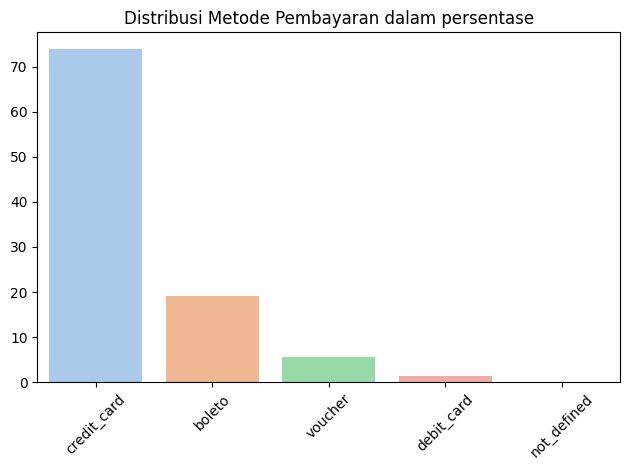

In [ ]:
sns.barplot(
    x=payment_method_percentage.index,
    y=payment_method_percentage.values,
    palette='pastel'
)

plt.xlabel('')
plt.ylabel('')
plt.title('Distribusi Metode Pembayaran dalam persentase')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Pertanyaan 2: Kota mana saja yang memiliki penjualan tertinggi?

In [ ]:
# menggabungkan tabel customers_df dan orders_df
merged_cust_order_df = pd.merge(customers_df, orders_df, on='customer_id', how='inner')

In [ ]:
# mengelompokkan berdasarkan kota dan menghitung jumlah order
sales_by_city = merged_cust_order_df.groupby('customer_city')['order_id'].count()

In [ ]:
# mengurutkan kota berdasarkan penjualan (ascending=False untuk tertinggi di atas)
sorted_sales = sales_by_city.sort_values(ascending=False)

In [ ]:
# kota dengan penjualan tertinggi
highest_sales_city = sorted_sales.head()
highest_sales_value = sorted_sales.iloc()

df_highest_sales = pd.DataFrame({'Kota': highest_sales_city.index, 'Jumlah Penjualan': highest_sales_city.values})
print(df_highest_sales)

             Kota  Jumlah Penjualan
0       sao paulo             15540
1  rio de janeiro              6882
2  belo horizonte              2773
3        brasilia              2131
4        curitiba              1521


Text(0.5, 1.0, 'Top 5 Kota dengan Jumlah Penjualan Tertinggi')

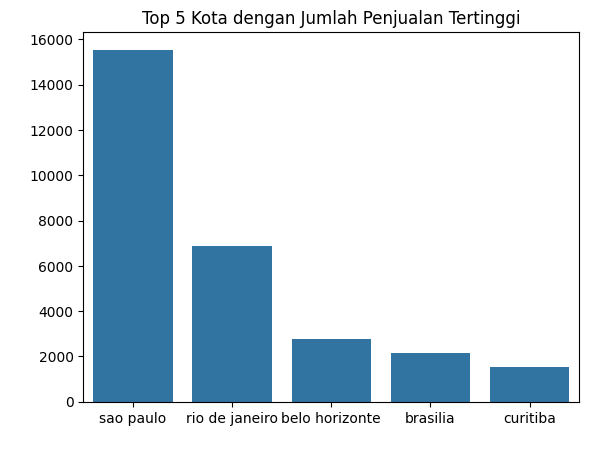

In [ ]:
# memvisualisasikan 5 kota dengan jumlah penjualan tertinggi
top_5_cities = sorted_sales.head(5)
sns.barplot(x=top_5_cities.index, y=top_5_cities.values)
plt.xlabel(' ')
plt.ylabel(' ')
plt.title('Top 5 Kota dengan Jumlah Penjualan Tertinggi')


### Pertanyaan 3: Bagaimana performa penjualan berdasarkan kategori?

In [ ]:
# merge order_items_df dan products_df berdasarkan product_id
items_products_df = pd.merge(order_items_df, products_df, on='product_id', how='inner')

# hasil merge kedua tabel di atas, kita merge lagi dengan product_category_df berdasarkan product_category_name
merged_df = pd.merge(items_products_df, product_category_df, on='product_category_name', how='inner')

In [ ]:
# menghitung frekuensi pembelian setiap kategori
category_counts = merged_df['product_category_name_english'].value_counts()

In [ ]:
# mengurutkan kategori pembelian produk
sorted_category = category_counts.sort_values(ascending=False)

In [ ]:
sorted_category.head()

,count
product_category_name_english,
bed_bath_table,12718
health_beauty,9670
sports_leisure,8641
furniture_decor,8334
computers_accessories,7827


Text(0.5, 1.0, 'Top 5 Kategori Produk dengan Jumlah Penjualan Tertinggi')

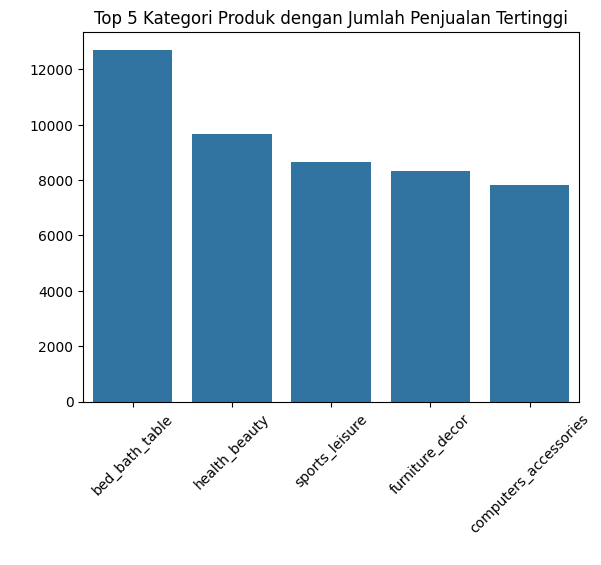

In [ ]:
# memvisualisasikan 5 kategori produk dengan jumlah penjualan tertinggi
top_5_category = sorted_category.head(5)
sns.barplot(x=top_5_category.index, y=top_5_category.values)
plt.xlabel(' ')
plt.ylabel(' ')
plt.xticks(rotation=45)
plt.title('Top 5 Kategori Produk dengan Jumlah Penjualan Tertinggi')


## Conclusion

- Berdasarkan pie chart diatas, metode pembayaran yang paling banyak digunakan oleh pelanggan adalah credit card (73,9%), kemudian boleto(19%) dan voucher (5%). Dan debit card adalah metode pembayaran yang paling sedikit digunakan.

- Penjualan tertinggi terjadi di kota Sao Paulo dengan jumlah penjualan sebanyak 15540 penjualan, kemudian Rio De Janeiro dengan 6882 penjualan dan seterusnya.

- Kategori produk yang paling banyak diminati adalah bed bath table dengan 1278 penjualan, kemudian disusul dengan health beauty, dan seterusnya.

##Export cleaned dataset

In [ ]:
customers_df.to_csv('customers_clean.csv', index=False)
products_df.to_csv('products_clean.csv', index=False)
product_category_df.to_csv('product_category_clean.csv', index=False)
orders_df.to_csv('order_clean_csv', index=False)
order_payments_df.to_csv('order_payments_clean.csv', index=False)
order_items_df.to_csv('order_items_clean.csv', index=False)